In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('waste.csv')

In [35]:
df = pd.read_csv('waste.csv')

In [36]:
df.shape

(6238, 14)

In [37]:
rows, cols = df.shape
print("Number of Rows       = ", rows)
print("Number of Columns    = ", cols)

Number of Rows       =  6238
Number of Columns    =  14


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       6238 non-null   object 
 1   Domain            6238 non-null   object 
 2   Area Code (ISO3)  6238 non-null   object 
 3   Area              6238 non-null   object 
 4   Element Code      6238 non-null   int64  
 5   Element           6238 non-null   object 
 6   Item Code         6238 non-null   int64  
 7   Item              6238 non-null   object 
 8   Year Code         6238 non-null   int64  
 9   Year              6238 non-null   int64  
 10  Unit              6238 non-null   object 
 11  Value             6238 non-null   float64
 12  Flag              6238 non-null   object 
 13  Flag Description  6238 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 682.4+ KB


In [39]:
df.isnull().sum()

Domain Code         0
Domain              0
Area Code (ISO3)    0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [40]:
df.describe()

,Element Code,Item Code,Year Code,Year,Value
count,6238.0,6238.0,6238.000000,6238.000000,6238.000000
mean,7273.0,6990.0,2004.677300,2004.677300,202.675467
std,0.0,0.0,8.603289,8.603289,1066.676986
min,7273.0,6990.0,1990.000000,1990.000000,0.000000
25%,7273.0,6990.0,1997.000000,1997.000000,0.000000
50%,7273.0,6990.0,2005.000000,2005.000000,0.652579
75%,7273.0,6990.0,2012.000000,2012.000000,30.517272
max,7273.0,6990.0,2019.000000,2019.000000,11151.696410


In [41]:
df.drop_duplicates(inplace=True)
print('Shape of Dataset after dropping the duplicates', df.shape)

Shape of Dataset after dropping the duplicates (6238, 14)


In [42]:
df['Value'].agg(['skew', 'kurtosis']).transpose()


skew         8.415818
kurtosis    75.170198
Name: Value, dtype: float64

c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

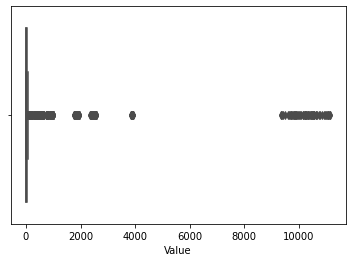

In [43]:
sns.boxplot(df['Value'], color="red")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'China, mainland'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'United States of America'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'France'),
  Text(7, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(8, 0, 'Republic of Korea'),
  Text(9, 0, 'India'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'China, Hong Kong SAR'),
  Text(13, 0, 'Dominican Republic'),
  Text(14, 0, 'Malaysia'),
  Text(15, 0, 'Haiti'),
  Text(16, 0, 'Cuba'),
  Text(17, 0, 'Philippines'),
  Text(18, 0, 'Viet Nam'),
  Text(19, 0, 'Switzerland'),
  Text(20, 0, 'Spain'),
  Text(21, 0, 'Jamaica'),
  Text(22, 0, 'Poland'),
  Text(23, 0, 'Austria'),
  Text(24, 0, 'Greece'),
  Text(25, 0, 'Australia'),
  Text(26, 0, 'Mongolia'),
  Text(27, 0, 'Portugal'),
  Text(28, 0, 'Sweden'),
  Text(29, 0,

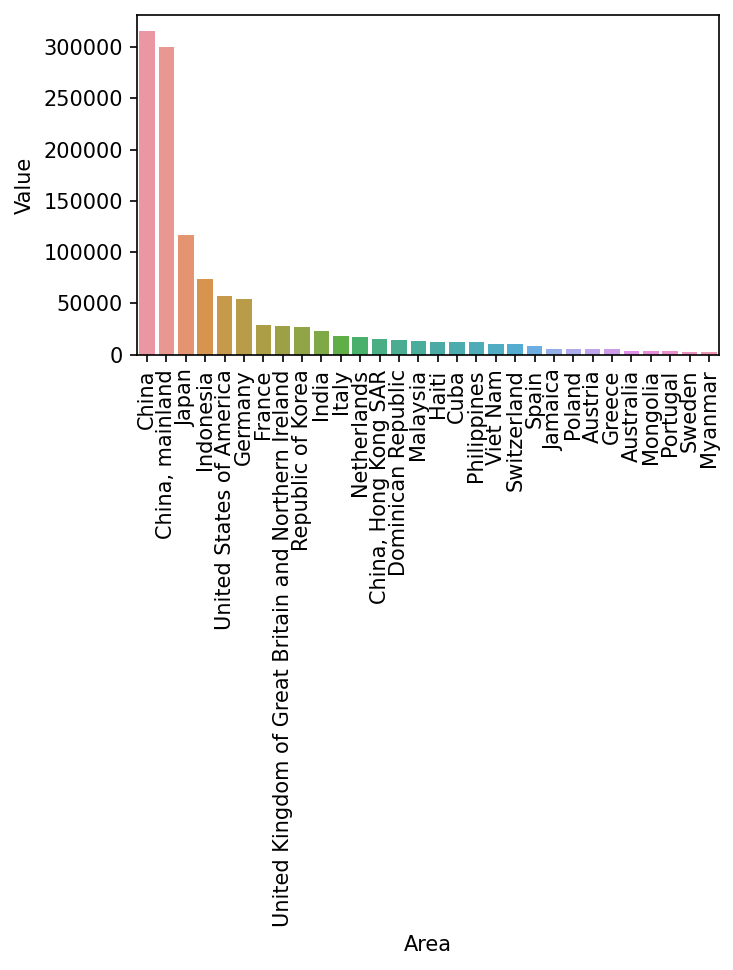

In [44]:
a = df.groupby(["Area"]).sum().sort_values(
    by=["Value"], ascending=False).head(30)
a

plt.figure(figsize=(5, 3), dpi=150, linewidth=2)
sns.barplot(x=a.index, y='Value', data=a)
plt.xticks(rotation=90)

In [49]:
#Adding a new column of Continent 
#pip install pycountry_convert
# # #Making new columns of Continent for Visualization

import pycountry_convert as pc
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
# Example
# country_name = 'Chagos Archipelago'
# print(country_to_continent(country_name))
continent=[]
for i in df['Area']:
    
   if i=='Chagos Archipelago':
       continent.append('Africa')
       
   elif i=='Western Sahara':
       continent.append('Africa')
   elif i=='Channel Islands'  :
       continent.append('Europe')
   elif i=='China, Hong Kong SAR'  :
       continent.append('Asia')
   elif i=='China, Macao SAR'  :
       continent.append('Asia')
   elif i=='China, mainland'  :
       continent.append('Asia')
   elif i=='China, Taiwan Province of'  :
       continent.append('Asia')
   elif i=='French Guyana'  :
       continent.append('South America')
   elif i=='French Southern Territories'  :
       continent.append('Antarctica')
   elif i=='Heard and McDonald Islands'  :
       continent.append('Antarctica')
   elif i=='Holy See'  :
       continent.append('Europe')
   elif i=='Iran (Islamic Republic of)'  :
       continent.append('Europe')
   elif i=='Johnston Island'  :
       continent.append('Oceania')
   elif i=='Micronesia (Federated States of)'  :
       continent.append('Oceania')
   elif i=='Midway Island'  :
       continent.append('North America')
   elif i=='Netherlands Antilles (former)'  :
       continent.append('Europe')
   elif i=='Pitcairn'  :
       continent.append('Oceania')
   elif i=='Wake Island'  :
       continent.append('Oceania')
   elif i=='Wallis and Futuna Islands'  :
       continent.append('Oceania')
   elif i=='Republic of Korea'  :
       continent.append('Asia')
   elif i=='Serbia and Montenegro'  :
       continent.append('Europe')
   elif i=='Sudan (former)'  :
       continent.append('Asia')
   elif i=='Timor-Leste'  :
       continent.append('Asia')
   elif i=='Venezuela (Bolivarian Republic of)'  :
       continent.append('South America')
   elif i=='Antarctica' :
       continent.append('Antarctica')
   elif i=='Bolivia (Plurinational State of)' :
       continent.append('South America')
   else:
      continent.append(country_to_continent(i))

df["continent"]=continent

KeyError: "Invalid Country Name: 'Belgium-Luxembourg'"